In [41]:
import pandas as pd
import numpy as np
import yfinance as yf
import joblib
import matplotlib.pyplot as plt
from ta.momentum import RSIIndicator
from ta.trend import MACD, SMAIndicator, EMAIndicator

In [42]:
model = joblib.load("../models/stock_movement_model.pkl")
data = pd.read_csv("../data/processed_stock_data.csv")

In [43]:
X = data[["SMA_10","SMA_20","EMA_10","EMA_20","MACD","MACD_Signal","RSI","Price_Change"]]
y = data["Target"]

In [44]:
predictions = model.predict(X)
data["Predicted"] = predictions

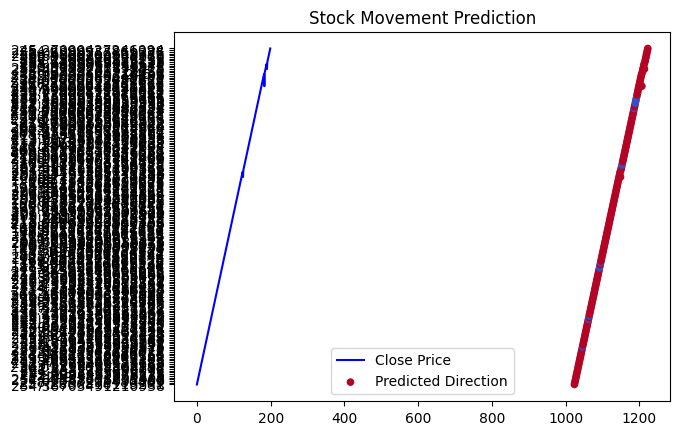

In [45]:
plt.plot(data["Close"].values[-200:], label="Close Price", color="blue")
plt.scatter(range(len(data))[-200:], data["Close"].values[-200:], 
            c=data["Predicted"].values[-200:], cmap="coolwarm", label="Predicted Direction", s=20)
plt.title("Stock Movement Prediction")
plt.legend()
plt.show()

In [46]:
stock_symbol = "AAPL"
latest_data = yf.download(stock_symbol, period="90d", interval="1d")
latest_data.dropna(inplace=True)

C:\Users\neelo\AppData\Local\Temp\ipykernel_7756\1212487499.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  latest_data = yf.download(stock_symbol, period="90d", interval="1d")
[*********************100%***********************]  1 of 1 completed


In [47]:
latest_data["SMA_10"] = SMAIndicator(close=latest_data["Close"].squeeze(), window=10).sma_indicator()
latest_data["SMA_20"] = SMAIndicator(close=latest_data["Close"].squeeze(), window=20).sma_indicator()
latest_data["EMA_10"] = EMAIndicator(close=latest_data["Close"].squeeze(), window=10).ema_indicator()
latest_data["EMA_20"] = EMAIndicator(close=latest_data["Close"].squeeze(), window=20).ema_indicator()



In [48]:
macd = MACD(close=latest_data["Close"].squeeze())
latest_data["MACD"] = macd.macd()
latest_data["MACD_Signal"] = macd.macd_signal()



In [49]:
rsi = RSIIndicator(close=latest_data["Close"].squeeze(), window=14)
latest_data["RSI"] = rsi.rsi()

In [50]:
latest_data["Price_Change"] = latest_data["Close"].pct_change()
latest_data.dropna(inplace=True)



In [51]:
latest_features = latest_data[["SMA_10","SMA_20","EMA_10","EMA_20","MACD","MACD_Signal","RSI","Price_Change"]].iloc[-1:]
predicted_move = model.predict(latest_features)[0]


c:\Users\neelo\OneDrive\Desktop\CODES\Project\STP\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [52]:
print("Next movement prediction for", stock_symbol, ":", "UP" if predicted_move == 1 else "DOWN")

Next movement prediction for AAPL : UP
